In [1]:
eleicao = read.csv("../dataset/Eleicao.csv",sep=";", header=T)
eleicao

CANDIDATO,SITUACAO,DESPESAS
George Turner,0,10
Victor Johnson,0,100
Jerry Perry,1,1600
Shirley Cook,1,1500
Carolyn Bailey,1,3300
Susan Sanders,0,200
Anthony Harris,1,1800
Philip Richardson,1,1700
Eugene Phillips,0,300
Mildred Morris,1,1800


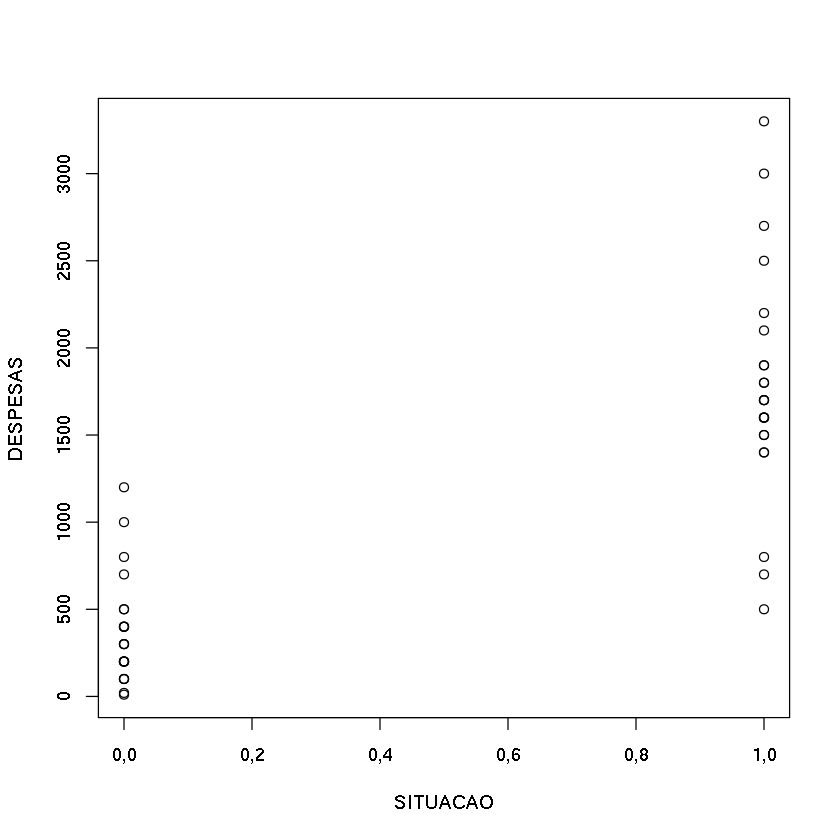

In [2]:
plot(DESPESAS ~ SITUACAO, data=eleicao)

In [5]:
cor(eleicao$DESPESAS,eleicao$SITUACAO) # correlação

[1] 0,8121872

In [8]:
modelo = glm(SITUACAO ~ DESPESAS, data= eleicao, family="binomial") # family que fala que é logistica
modelo


Call:  glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = eleicao)

Coefficients:
(Intercept)     DESPESAS  
  -4,602880     0,004984  

Degrees of Freedom: 46 Total (i.e. Null);  45 Residual
Null Deviance:	    65,13 
Residual Deviance: 18,54 	AIC: 22,54

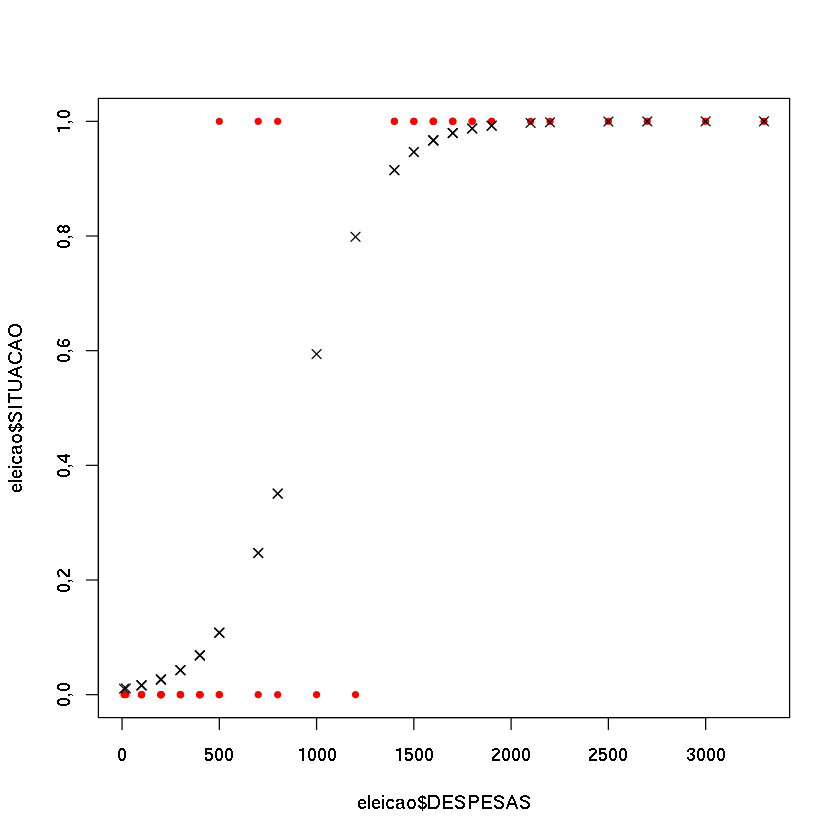

In [10]:
plot(eleicao$DESPESAS,eleicao$SITUACAO, col = "red", pch=20) # dados do dataset
points(eleicao$DESPESAS, modelo$fitted, pch=4) # linha de melhor ajuste do modelo

In [13]:
# Testando com os mesmos candidados (O certo é dividir os dados, mas depois vou usar novos dados)
previsao = predict(modelo, newdata = eleicao, type="response")
previsao[0:5] # gera em propabilidade

1          2          3          4          5 
0,01042526 0,01623026 0,96678472 0,94647525 0,99999281

In [15]:
previsao = previsao >= 0.5 # transformar em true e false
previsao[0:5]

1     2     3     4     5 
FALSE FALSE  TRUE  TRUE  TRUE

In [17]:
# comparar com matriz de confusão os dados
matrix_conf = table(previsao, eleicao$SITUACAO)
matrix_conf  # TP | FP
             # FN | TN  

        
previsao  0  1
   FALSE 21  3
   TRUE   2 21

In [21]:
taxa_acerto=(matrix_conf[1]+matrix_conf[4])/sum(matrix_conf)
taxa_acerto # soma dos acertos divididos pelo total de dados

[1] 0,893617

# Novos Candidatos

In [23]:
nova_eleicao = read.csv("../dataset/NovosCandidatos.csv", sep = ";", header = T)
nova_eleicao

CANDIDATO,DESPESAS
A,0
B,10
C,200
D,500
E,900
F,1500
G,3000


In [27]:
nova_eleicao$RESULTADO = predict(modelo, newdata = nova_eleicao, type = "response")
nova_eleicao$RESULTADO # em propabilidade
nova_eleicao$RESULTADO = nova_eleicao$RESULTADO >= 0.5 # convertido para true e false

[1] 0,009923466 0,010425261 0,026438255 0,108027149 0,470635921 0,946475247
[7] 0,999967947

In [29]:
 nova_eleicao # dados com nova coluna com o resultado

CANDIDATO,DESPESAS,RESULTADO
A,0,FALSE
B,10,FALSE
C,200,FALSE
D,500,FALSE
E,900,FALSE
F,1500,TRUE
G,3000,TRUE


# obs: fazer sempre copia do dataset para nao perder os dados originais.